# Importing of Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree
from sklearn.model_selection import GridSearchCV

sb.set() # set the default Seaborn style for graphics

In [3]:
air_data = pd.read_csv("listings_june.csv")

# Creating new labels

In [4]:
row_indexes=air_data[air_data['review_scores_rating']>=4.0].index

In [5]:
air_data.loc[row_indexes,'high_rating']="yes"

In [6]:
row_indexes=air_data[air_data['review_scores_rating']<4.0].index
air_data.loc[row_indexes,'high_rating']="no"
air_data

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,high_rating
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,4.00,4.00,NaN,f,2,0,2,0,0.01,yes
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,4.72,4.50,NaN,f,1,0,1,0,0.22,yes
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,4.17,4.67,NaN,f,2,0,2,0,0.16,yes
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4.26,4.32,NaN,t,4,0,4,0,0.29,yes
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4.17,4.04,NaN,t,4,0,4,0,0.34,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50664451,https://www.airbnb.com/rooms/50664451,20210629180711,2021-06-30,2BR Entire Apt [Q] ★ 2mins walk to Queenstown MRT,A spacious and fully furnished 2 rooms unit. <...,NaN,https://a0.muscache.com/pictures/63b23295-08b0...,375967617,https://www.airbnb.com/users/show/375967617,...,NaN,NaN,NaN,f,42,42,0,0,NaN,NaN
4234,50665321,https://www.airbnb.com/rooms/50665321,20210629180711,2021-06-30,2BR Entire Apt [E2] ★ 4mins walk to Novena MRT,2BR<br /><br /><b>The space</b><br />Apartment...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,375967617,https://www.airbnb.com/users/show/375967617,...,NaN,NaN,NaN,f,42,42,0,0,NaN,NaN
4235,50665577,https://www.airbnb.com/rooms/50665577,20210629180711,2021-06-30,3BR Entire Apt [E2] ★ 4mins walk to Novena MRT,A cozy and fully furnished 3 rooms apartment.<...,NaN,https://a0.muscache.com/pictures/a0c7231d-4ea4...,375967617,https://www.airbnb.com/users/show/375967617,...,NaN,NaN,NaN,f,42,42,0,0,NaN,NaN
4236,50685676,https://www.airbnb.com/rooms/50685676,20210629180711,2021-06-30,2 Bedrooms Apartment,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,50546965,https://www.airbnb.com/users/show/50546965,...,NaN,NaN,NaN,f,1,1,0,0,NaN,NaN


In [7]:
air_data['has_aircon'] = air_data['amenities'].str.contains("Air conditioning")
air_data['has_washer'] = air_data['amenities'].str.contains("Washer")
air_data['has_wifi'] = air_data['amenities'].str.contains("Wifi")
air_data['has_longterm'] = air_data['amenities'].str.contains("Long term stays allowed")
air_data['has_kitchen'] = air_data['amenities'].str.contains("Kitchen")
air_data['has_hangers'] = air_data['amenities'].str.contains("Hangers")
air_data['has_pool'] = air_data['amenities'].str.contains("Pool")
air_data['has_hairdryer'] = air_data['amenities'].str.contains("Hair dryer")
air_data['has_hangers'] = air_data['amenities'].str.contains("Hangers")
air_data['has_workspace'] = air_data['amenities'].str.contains("Dedicated workspace")

air_data.head(10)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,high_rating,has_aircon,has_washer,has_wifi,has_longterm,has_kitchen,has_hangers,has_pool,has_hairdryer,has_workspace
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,yes,True,True,True,True,False,False,False,False,False
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,yes,True,True,True,True,True,False,True,False,False
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,yes,True,True,True,False,True,False,False,False,False
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,yes,True,True,True,True,True,True,False,True,True
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,yes,True,True,True,True,True,False,False,True,False
5,71903,https://www.airbnb.com/rooms/71903,20210629180711,2021-06-30,Room 2-near Airport & EXPO,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,https://a0.muscache.com/pictures/568743/7bc623...,367042,https://www.airbnb.com/users/show/367042,...,yes,True,True,True,True,True,False,False,True,False
6,275343,https://www.airbnb.com/rooms/275343,20210629180711,2021-06-30,"Conveniently located City Room!(1,2,3,4,5,6,7,8)",Awesome location and host <br />Room near INSE...,NaN,https://a0.muscache.com/pictures/11979330/9bbd...,1439258,https://www.airbnb.com/users/show/1439258,...,yes,True,True,True,True,True,False,False,True,False
7,275344,https://www.airbnb.com/rooms/275344,20210629180711,2021-06-30,15 mins to Outram MRT Single Room (B),Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,https://a0.muscache.com/pictures/4669645/563ab...,1439258,https://www.airbnb.com/users/show/1439258,...,yes,True,True,True,True,True,False,False,True,False
8,294281,https://www.airbnb.com/rooms/294281,20210629180711,2021-06-30,5 mins walk from Newton subway,I have 3 bedrooms in a charming British style...,NaN,https://a0.muscache.com/pictures/4607862/87f42...,1521514,https://www.airbnb.com/users/show/1521514,...,yes,True,True,True,True,True,True,False,True,True
9,301247,https://www.airbnb.com/rooms/301247,20210629180711,2021-06-30,Nice room with private bath beside train station,Located just beside the PayaLebar train statio...,NaN,https://a0.muscache.com/pictures/107631887/bc6...,1552002,https://www.airbnb.com/users/show/1552002,...,yes,True,True,True,True,True,False,True,True,True


In [8]:
True_Count = air_data[air_data.has_aircon == True]

len(True_Count)

4107

In [9]:
True_Count = air_data[air_data.has_washer == True]
len(True_Count)

3630

In [10]:
def make_label(high_rating):
    if high_rating == "yes":
        return 1
    else:
        return 0

In [11]:
air_data['high_rating_label'] = air_data['high_rating'].apply(make_label)
air_data.head(20)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,has_aircon,has_washer,has_wifi,has_longterm,has_kitchen,has_hangers,has_pool,has_hairdryer,has_workspace,high_rating_label
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,True,True,True,True,False,False,False,False,False,1
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,True,True,True,True,True,False,True,False,False,1
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,True,True,True,False,True,False,False,False,False,1
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,True,True,True,True,True,True,False,True,True,1
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,True,True,True,True,True,False,False,True,False,1
5,71903,https://www.airbnb.com/rooms/71903,20210629180711,2021-06-30,Room 2-near Airport & EXPO,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,https://a0.muscache.com/pictures/568743/7bc623...,367042,https://www.airbnb.com/users/show/367042,...,True,True,True,True,True,False,False,True,False,1
6,275343,https://www.airbnb.com/rooms/275343,20210629180711,2021-06-30,"Conveniently located City Room!(1,2,3,4,5,6,7,8)",Awesome location and host <br />Room near INSE...,NaN,https://a0.muscache.com/pictures/11979330/9bbd...,1439258,https://www.airbnb.com/users/show/1439258,...,True,True,True,True,True,False,False,True,False,1
7,275344,https://www.airbnb.com/rooms/275344,20210629180711,2021-06-30,15 mins to Outram MRT Single Room (B),Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,https://a0.muscache.com/pictures/4669645/563ab...,1439258,https://www.airbnb.com/users/show/1439258,...,True,True,True,True,True,False,False,True,False,1
8,294281,https://www.airbnb.com/rooms/294281,20210629180711,2021-06-30,5 mins walk from Newton subway,I have 3 bedrooms in a charming British style...,NaN,https://a0.muscache.com/pictures/4607862/87f42...,1521514,https://www.airbnb.com/users/show/1521514,...,True,True,True,True,True,True,False,True,True,1
9,301247,https://www.airbnb.com/rooms/301247,20210629180711,2021-06-30,Nice room with private bath beside train station,Located just beside the PayaLebar train statio...,NaN,https://a0.muscache.com/pictures/107631887/bc6...,1552002,https://www.airbnb.com/users/show/1552002,...,True,True,True,True,True,False,True,True,True,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    air_data[['has_aircon', 'has_washer', 'has_wifi', 'has_longterm', 'has_kitchen', 'has_hangers', 'has_pool']], # the first is our FEATURES
    air_data[['high_rating_label']],
    test_size=0.2) # 80% training, 20% testing

In [13]:
X_train

,has_aircon,has_washer,has_wifi,has_longterm,has_kitchen,has_hangers,has_pool
2241,True,True,True,True,True,True,False
1626,True,True,True,True,True,True,False
1388,True,True,True,True,True,True,True
467,True,True,True,True,True,False,False
2051,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
156,True,True,True,True,True,True,False
1133,True,True,True,True,True,True,False
1513,True,False,True,True,False,False,False
3078,True,True,True,True,True,True,True


In [14]:
X_test

,has_aircon,has_washer,has_wifi,has_longterm,has_kitchen,has_hangers,has_pool
2764,True,True,True,True,True,True,True
4028,True,True,True,True,True,True,True
1115,True,True,True,True,True,True,False
1534,True,True,True,True,True,False,False
2641,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
3864,True,True,True,True,True,True,True
2831,True,True,True,True,True,True,True
980,True,True,True,True,True,True,False
3351,True,True,True,True,True,False,True


In [15]:
y_train

,high_rating_label
2241,1
1626,1
1388,1
467,1
2051,1
...,...
156,1
1133,1
1513,0
3078,0


In [16]:
y_test

,high_rating_label
2764,1
4028,1
1115,1
1534,1
2641,0
...,...
3864,0
2831,1
980,1
3351,1


In [17]:
print("Length of training labels:", len(y_train))
print("Length of testing labels:", len(y_test))
print("Length of training features:", len(X_train))
print("Length of testing features:", len(X_test))

Length of training labels: 3390
Length of testing labels: 848
Length of training features: 3390
Length of testing features: 848


In [18]:
from sklearn import naive_bayes
clf = naive_bayes.BernoulliNB()

In [19]:
clf.fit(X_train, y_train.values.ravel())
clf.predict(X_test)

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,

In [20]:
clf.score(X_test, y_test)

0.5707547169811321

In [21]:
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

<function matplotlib.pyplot.show(close=None, block=None)>

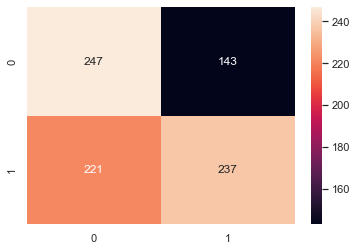

In [22]:
import seaborn as sns
sns.heatmap(data=confusion_matrix(y_test, y_test_pred) ,annot =True, fmt=".0f")
plt.show

In [24]:
cmTest = confusion_matrix(y_test, y_test_pred)
acTest = accuracy_score(y_test, y_test_pred)
print("Accuracy:", acTest)
TP = cmTest[1][1]
FN = cmTest[1][0]
FP = cmTest[0][1]
TN = cmTest[0][0]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# False negative rate
FNR = FN/(TP+FN)
print("True Positive Rate is  (Test Data): ",TPR)
print("False Positive Rate is (Test Data): ",FNR)

Accuracy: 0.5707547169811321
True Positive Rate is  (Test Data):  0.517467248908297
False Positive Rate is (Test Data):  0.48253275109170307


<function matplotlib.pyplot.show(close=None, block=None)>

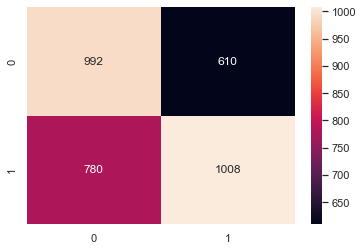

In [26]:
import seaborn as sns
sns.heatmap(data=confusion_matrix(y_train, y_train_pred) ,annot =True, fmt=".0f")
plt.show

In [25]:
cmTrain = confusion_matrix(y_train, y_train_pred)
acTrain = accuracy_score(y_train, y_train_pred)
print("Accuracy:", acTrain)
TP = cmTrain[1][1]
FN = cmTrain[1][0]
FP = cmTrain[0][1]
TN = cmTrain[0][0]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# False negative rate
FNR = FN/(TP+FN)
print("True Positive Rate is  (Train Data): ",TPR)
print("False Positive Rate is (Train Data): ",FNR)

Accuracy: 0.5899705014749262
True Positive Rate is  (Train Data):  0.5637583892617449
False Positive Rate is (Train Data):  0.436241610738255


In [207]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60       414
           1       0.61      0.52      0.56       434

    accuracy                           0.58       848
   macro avg       0.58      0.58      0.58       848
weighted avg       0.58      0.58      0.58       848



In [208]:
#pip install xgboost

In [209]:
# conda install -c conda-forge python-graphviz

In [210]:
#Tuning the Parameters

parameters_for_testing = {
    'colsample_bytree':[0.3,0.5],
    'learning_rate':[0.1,0.5],
    'alpha': [10,12],
    'max_depth':[3,5],
    'n_estimators':[2000],  
}

                    
xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     gamma=0, colsample_bytree=0.8)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_train)

print(gsearch1.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [211]:
# Fitting and Training the model for Train & Test sets
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 2000)

xgb_reg.fit(X_train,y_train)

test_preds = xgb_reg.predict(X_test)
train_preds = xgb_reg.predict(X_train)

[17:50:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [212]:
rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print("RMSE: %f" % (rmse))

RMSE: 0.491030


In [213]:

test_predictions = [round(value) for value in test_preds]
# evaluate predictions
accuracy = accuracy_score(y_test, test_predictions)
accuracy

0.5695754716981132

In [214]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.55      0.60      0.58       414
           1       0.59      0.54      0.56       434

    accuracy                           0.57       848
   macro avg       0.57      0.57      0.57       848
weighted avg       0.57      0.57      0.57       848



In [215]:
# Weightage/Importance of each variable 
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
has_longterm,0.016517
has_washer,0.059839
has_aircon,0.063101
has_kitchen,0.072458
has_wifi,0.092095
has_hangers,0.124752
has_pool,0.571239


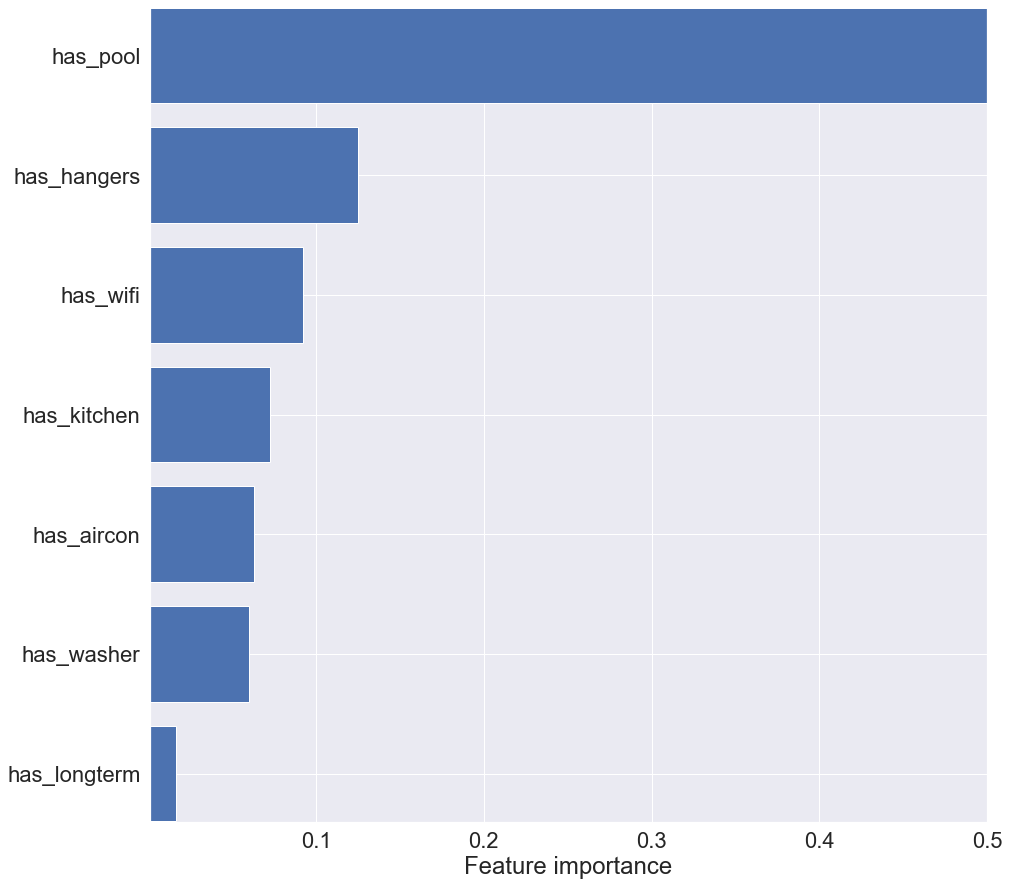

In [216]:
# Plotting feature importances
sb.set(font_scale=2)
plt.figure(figsize=(15,15))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.xlabel("Feature importance")
plt.margins(y=0.001)
plt.xlim(0.001, 0.5)
plt.show()

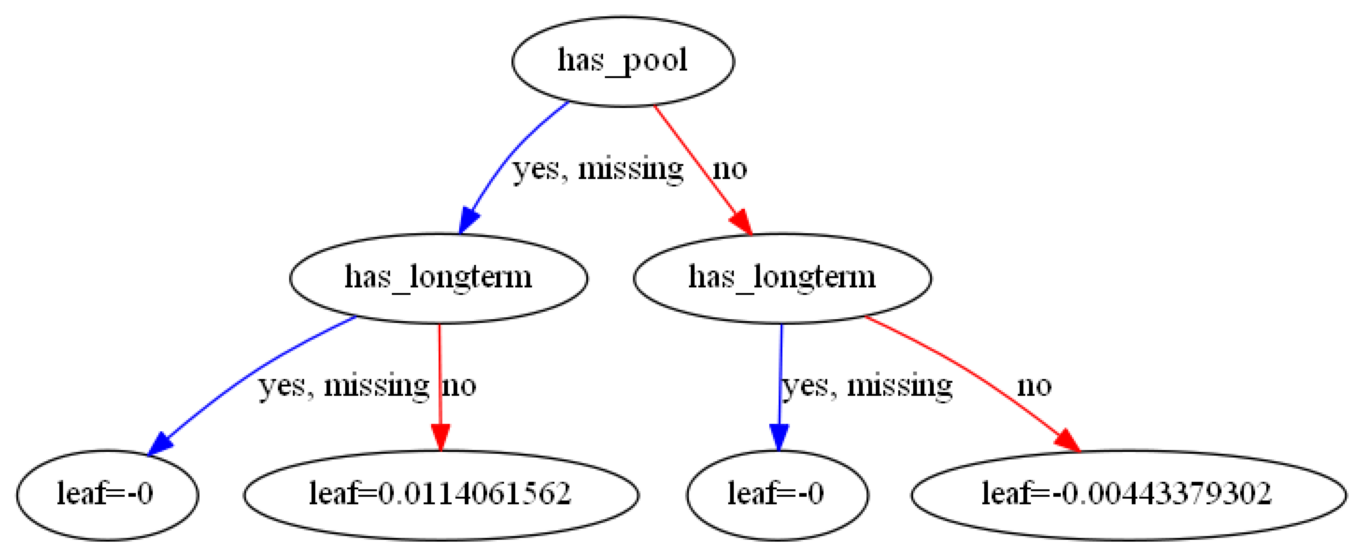

In [217]:
import matplotlib.pyplot as plt

xgb.plot_tree(xgb_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [60, 10]
plt.show()